### Current Neural network
<img src="img/net.png" height="40%" width="40%">


### Activation function
Needed to make the neurons output nonlinear

<function matplotlib.pyplot.show(close=None, block=None)>

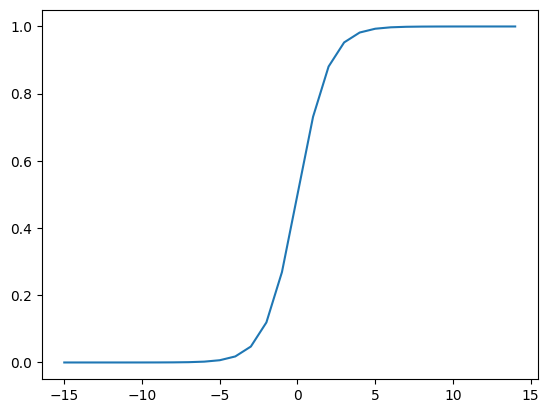

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(input: float | list) -> float | list:
    return 1. / (1 + np.exp(-input))

plt.plot(np.arange(-15, 15), sigmoid(np.arange(-15, 15)))
plt.show

### forward pass
Calculate the network results with fake weights the first time

In [14]:
x1, x2 = 3, 1
w1, w2, w3, w4 = 6, -3, -2, 5
w5, w6, w7, w8 = 1, -2, .25, 2

h1_in = x1 * w1 + x2 * w3
h2_in = x1 * w2 + x2 * w4

h1_out = sigmoid(h1_in)
h2_out = sigmoid(h2_in)

y1_in = h1_out * w5 + h2_out * w7
y2_in = h1_out * w6 + h2_out * w8

y1_out = sigmoid(y1_in)
y2_out = sigmoid(y2_in)

### loss function
- calculate how much the current weights are doing good 
- in this case we are using a simple function: "sum of squared errors"

In [15]:
y1_target, y2_target = 1, 0
e1, e2 = (y1_out - y1_target), (y2_out - y2_target)
sum_squared_error = sum([e ** 2 for e in [e1, e2]])

### backpropagation
- needed to update the weights of the network from the latests layer to the firsts (for caching reasons: the last value will be used by the firsts) 
- foreach weight calculate the partial derivative and minimize the loss function with the chain function

In [18]:
# partial derivative of y1_out and y2_out with respect of the loss function
y1_out_grad = 2 * e1
y2_out_grad = 2 * e2

# partial derivative of y1_in and y2_in with respect of the loss function
y1_in_grad = y1_out_grad * (y1_out * (1 - y1_out))
y2_in_grad = y2_out_grad * (y2_out * (1 - y2_out))

# partial derivative of w5, w6, w7, w8 with respect of the loss function
w5_grad = y1_in_grad * h1_out
w6_grad = y2_in_grad * h1_out
w7_grad = y1_in_grad * h2_out
w8_grad = y2_in_grad * h2_out

# partial derivative of h1_out and h2_out with respect of the loss function
h1_out_grad = y1_in_grad * w5 + y2_in_grad * w6
h2_out_grad = y1_in_grad * w7 + y2_in_grad * w8